# Geostatistics Demonstration - SGS/SIS/MPS

### Honggeun Jo, Assistant Professor, Inha University (Korea)
This demo showcases an implementation of basic geostatistical modelling, including sequential Gaussian simulation (**SGS**), sequential indicator simulation (**SIS**), and multi-point statistics (**MPS**). In this demo, we first import 2D well information with various reservoir properties, such as porosity, acoustic impedence, facies, permeability and brittleness. Then we calculate variogram to assess spatial continuity in the reservoir. Finally, with the designed variogram, we run SGS with (1) Python, which will be readily too heave as dimension rises, and (2) GSLIB, programed in Fortran by Dr. Clayton Deuatsch.:

1. Load open packages and import the CSV file (regarding well data) into Python using Pandas.
2. Visualize the well data.
3. Compute variogram.
4. **Implement SGS using Python**
5. **Repeat SGS with GSLIB**

The demo is presented by Honggeun Jo, an Assistant Professor at Inha University (Korea). You can reach out to him through his contacts on [Youtube/whghdrms](https://www.youtube.com/@whghdrms) | [GitHub/whghdrms](https://github.com/whghdrms) |  [GoogleScholar](https://scholar.google.com/citations?user=u0OE5CIAAAAJ&hl=en) | [LinkedIn](https://www.linkedin.com/in/honggeun-jo/)

**Note that this workflow was originally developed by Dr. Pyrcz, and the details can be found from the https://github.com/GeostatsGuy/GeostatsPy **


### 1. Load open packages and import the CSV file

In [27]:
## Import packages that will be used in this demo
import os                                                 # to set current working directory 
import numpy as np                                        # arrays and matrix math
import pandas as pd                                       # DataFrames
import matplotlib.pyplot as plt                           # plotting
import geostatspy.geostats as geostats
import geostatspy.GSLIB as GSLIB
import time

In [2]:
## Change working directory where you have well data
os.chdir("C:/Users/jhg13/001_CGAN_Research/GeostatsDemo") 

In [139]:
## Import well datat
df = pd.read_csv("1_sample_data.csv")                       # read a .csv file in as a DataFrame
df_1, df_2 = df[df['Facies']==1].sample(40),df[df['Facies']==0].sample(25),
df = pd.concat([df_1,df_2]).reset_index()
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity') # nscore transform for all facies porosity
df.describe()                                               # summary statistics 

,index,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,NPor
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,140.446154,307.476923,473.384615,520.307692,0.615385,0.139701,454.838864,5259.256878,-0.030613
std,80.650874,178.176011,303.334474,293.862315,0.490290,0.032841,2017.843565,1188.756141,1.098874
min,0.000000,0.000000,10.000000,39.000000,0.000000,0.060693,0.018054,2499.226928,-4.413014
25%,76.000000,161.000000,240.000000,280.000000,0.000000,0.117846,2.483003,4581.055216,-0.662435
50%,152.000000,329.000000,480.000000,519.000000,1.000000,0.133338,9.402715,5111.164955,0.000000
75%,204.000000,452.000000,680.000000,779.000000,1.000000,0.159164,58.992416,6036.231892,0.662435
max,269.000000,580.000000,990.000000,1014.000000,1.000000,0.221607,15731.641537,8260.108949,2.423196


### 2. Visualize the well data.

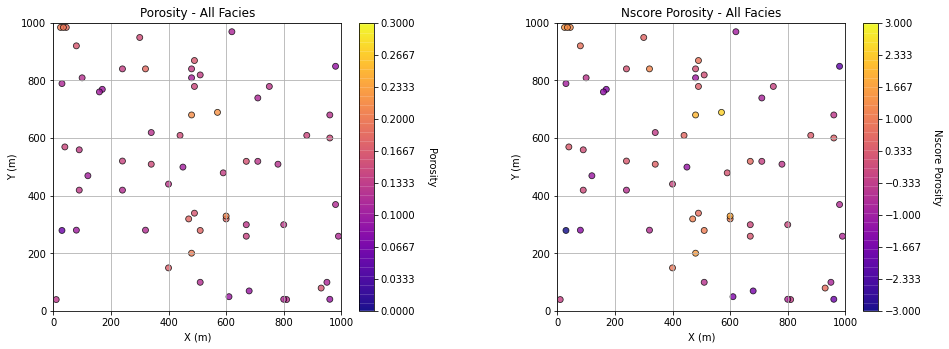

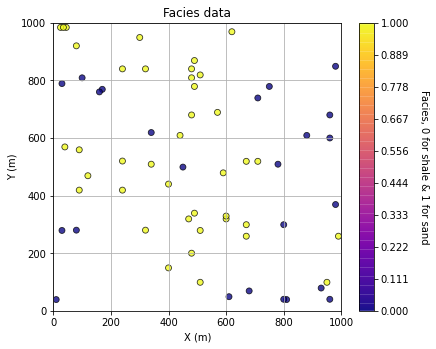

In [140]:
cmap = plt.cm.plasma #color map

## Visualize porosity Map
plt.figure()
plt.subplot(121)
GSLIB.locmap_st(df,'X','Y','Porosity',0,1000,0,1000,0,0.3,'Porosity - All Facies','X (m)','Y (m)','Porosity',cmap)
plt.grid()
plt.subplot(122)
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)
plt.grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1, wspace=0.4, hspace=0.3)
plt.show()

## Visualize facies Map
plt.figure()
plt.subplot(121)
GSLIB.locmap_st(df,'X','Y','Facies',0,1000,0,1000,0,1,'Facies data','X (m)','Y (m)','Facies, 0 for shale & 1 for sand',cmap)
plt.grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1, wspace=0.4, hspace=0.3)
plt.show()

### 3. Calulate variogram 

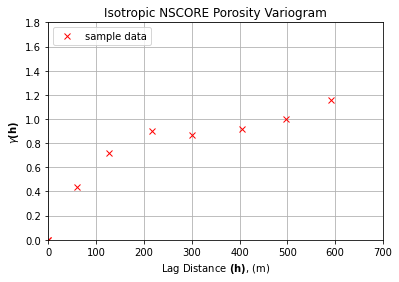

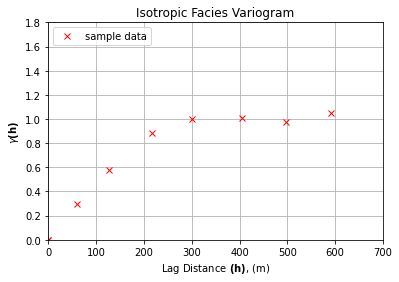

In [141]:
## Calculate Sample Data Isotropic Variograms
## These are variogram parameters, please refer to the reference books
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1

lag, por_gamma, por_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
plt.figure()
plt.plot(lag,por_gamma,'x',color='red',label='sample data')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

lag, por_gamma, por_npair = geostats.gamv(df,"X","Y","Facies",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
plt.figure()
plt.plot(lag,por_gamma,'x',color='red',label='sample data')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic Facies Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

 x,y,z offsets = 0.0,10.0


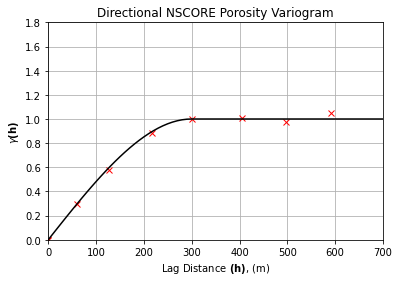

In [143]:
## Fit the above figure to a variogram model
nug = 0.0; # No nugget
nst = 1;   # 1 nest structure variogram model parameters                                       
it1 = 1;   # type 1 = Gaussian, 2 = Spherical, 3 = exponential
cc1 = 1.0; # sill
azi1 = 0;  # No need for isotropic variogram
hmaj1 = 300; hmin1 = 300 # Range

vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1) # make model object
nlag = 70; xlag = 10; azm = 0;                                # project the model in the 0 azimuth (doesn't matter since I assume isotropic)
index45,h45,gam45,cov45,ro45 = geostats.vmodel(nlag,xlag,azm,vario)

plt.plot(lag,por_gamma,'x',color = 'red')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.grid()

## 4. Run Sequential Gaussian simulation in Python (slow) 



 Data for SGSIM: Number of acceptable data     = 65
                 Number trimmed                = 0
                 Weighted Average              = 0.1397
                 Weighted Variance             = 0.0011
                 Weighted Transformed Average  = -0.0
                 Weighted Transformed Variance = 0.9806
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 250
   currently on node 500
   currently on node 750
   currently on node 1000
   currently on node 1250
   currently on node 1500
   currently on node 1750
   currently on node 2000
   currently on node 2250
Reassigning data to nodes

 Realization 0: number   = 2500
                                   mean     = 0.0885 (close to 0.0?)
                                   variance = 1.0081 (close to gammabar(V,V)? approx. 1.0)


C:\Users\jhg13\Anaconda3\envs\HG_main\lib\site-packages\geostatspy\GSLIB.py:700: MatplotlibDeprecationWarning: 
The 'verts' parameter of scatter() was deprecated in Matplotlib 3.2 and will be removed two minor releases later. If any parameter follows 'verts', they should be passed as keyword, not positionally.
  plt.scatter(


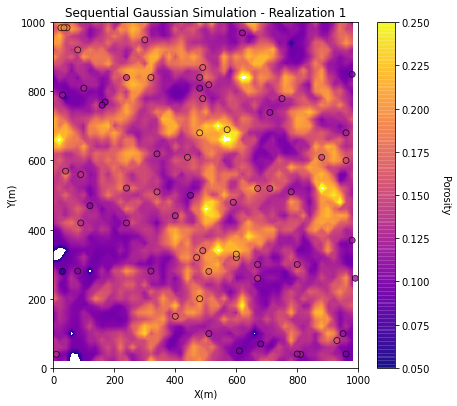

Wall time: 36.1 s


In [144]:
%%time

## Demonstration of Multiple Realizations - Short Continuity(100)
nx = 50; ny = 50; #number of cells
xsiz = 20.0; ysiz = 20.0; #cell size
xmn = 10.0; ymn = 10.0; # grid origin, location center of lower left cell

## basic indicator kriging parameters
nxdis = 1; nydis = 1   # block kriging discretizations, 1 for point kriging
ndmin = 0; ndmax = 20; # minimum and maximum data for kriging 
radius = 400;          # maximum search distance
ktype = 1;             # kriging type, 0 - simple, 1 - ordinary
skmean = 0             # desired mean (after Normal score transform, should be zero)
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)
tmin = -999; tmax = 999  # data trimming limits

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,twtcol=0,
            zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; 

cmap = plt.cm.plasma #color map
plt.subplot(131)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

## 4. Run sequential Gaussian simulation by GSLIB 


In [149]:
# Wrapper for GSLIB
%load_ext autoreload
%autoreload 2
from geostats_util import *
df['Z'] = 25# This is for 3D model, so I put a dummy Z ... this should be easily expand to 3D model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
## Define Variogram in dictionary format
vario_sgs = { "nug": 0,      # Nugger
              "nst": 1,      # Num. of structure
              "it1": 1,      # Variogram type, 1 = Gaussian, 2 = Spherical, 3 = exponential
              "cc1": 1,      # Sill
              "azi1": 0.0,   # Azimuth of major direction
              "dip1": 0.0,   # No dip
              "hmax1": 300,  # Major range (<- Lei, this is from your variogram)
              "hmed1": 300,  # Minor range (<- again, this is from your variogram)
              "hmin1": 150   # Vertical range
}

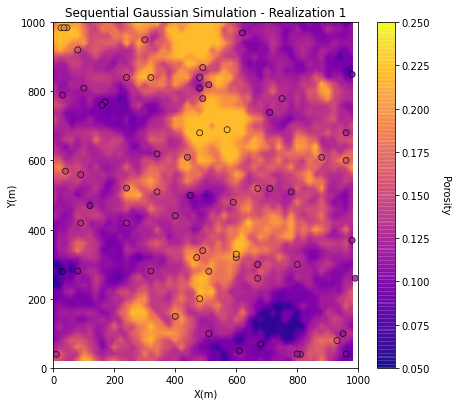

Wall time: 1.6 s


In [151]:
%%time
## Run SGS with GSLIB

# Creat Inputs for SGSIM.exe
Num_real = 1
nx,ny,nz = 50,50,1
xsiz = 20.0; ysiz = 20.0; #cell size
zsiz = 50.0
xmn = 0.0; ymn = 0.0; # grid origin, location center of lower left cell

Input_sgs = create_sgs_model(df, vario_sgs, Val_name = 'NPor',Val_range=[-3,3], Num_real = Num_real, seed=77777, 
                                 grid_dim = [nx,ny,nz], horizon_grid_size = xsiz, vertical_grid_size = zsiz, 
                                 ) 
# Run GSLIB and read output (sgsim.out) 
sgs = sgs_realizations(Input_sgs)
shape_of_sgs = sgs.shape

# Inverse transform of SGS realization
if len(sgs.shape)>=3:
    for i in range(sgs.shape[0]):
        sgs[i] = CDF_mapping(sgs[i],df['Porosity'].values).reshape(shape_of_sgs[1:])
        sgs[i] = sgs[i,::-1]
else:
    sgs = CDF_mapping(sgs,df['Porosity'].values).reshape(shape_of_sgs)
    sgs = sgs[::-1]

cmap = plt.cm.plasma #color map
plt.subplot(131)
GSLIB.locpix_st(sgs,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Wall time: 9.22 s


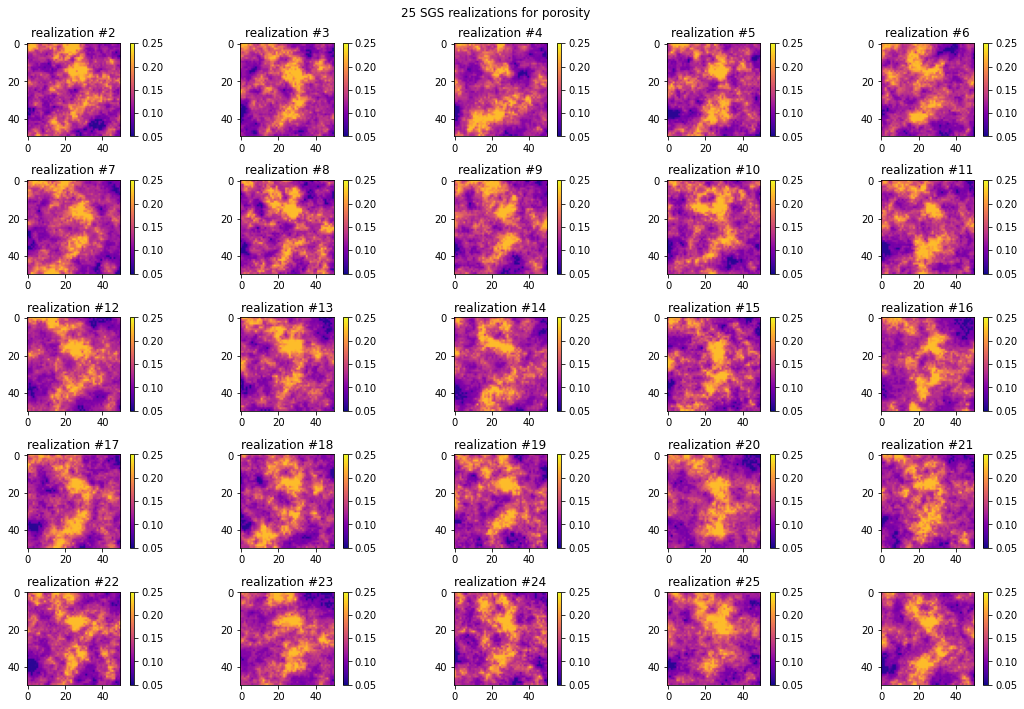

In [152]:
%%time
## Now, let's generate 25 realizations
Num_real = 25

Input_sgs = create_sgs_model(df, vario_sgs, Val_name = 'NPor',Val_range=[-3,3], Num_real = Num_real, seed=77777, 
                                 grid_dim = [nx,ny,nz], horizon_grid_size = xsiz, vertical_grid_size = zsiz, 
                                 ) 
# Run GSLIB and read output (sgsim.out) 
sgs = sgs_realizations(Input_sgs)
shape_of_sgs = sgs.shape

# Inverse transform of SGS realization
if len(sgs.shape)>=3:
    for i in range(sgs.shape[0]):
        sgs[i] = CDF_mapping(sgs[i],df['Porosity'].values).reshape(shape_of_sgs[1:])
        sgs[i] = sgs[i,::-1]
else:
    sgs = CDF_mapping(sgs,df['Porosity'].values).reshape(shape_of_sgs)
    sgs = sgs[::-1]

# visualize realizations
plt.figure(figsize = (15,10))
plt.suptitle('25 SGS realizations for porosity')
for i in range(25):
    plt.title(f'realization #{i+1}')
    plt.subplot(5,5,i+1)
    plt.imshow(sgs[i], cmap = 'plasma', vmin = 0.05, vmax = 0.25)
    plt.colorbar()
plt.tight_layout()

## + Seqeuntial indicator simulation for categorical variables

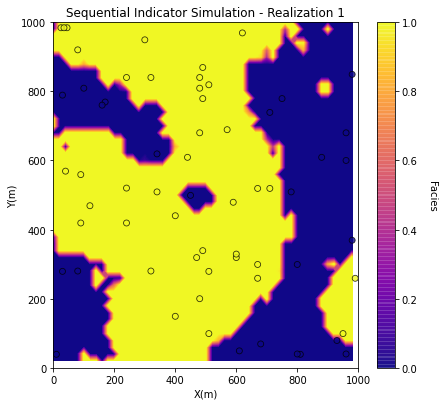

Wall time: 1.32 s


In [153]:
%%time
## Run SIS with GSLIB

# Creat Inputs for SGSIM.exe
Num_real = 1
Input_sis = create_sis_model(df, vario_sgs, Val_name = 'Facies',Val_range=[0,1], Num_real = Num_real, seed=77777, 
                                 grid_dim = [nx,ny,nz], horizon_grid_size = xsiz, vertical_grid_size = zsiz, 
                                 ) 
# Run GSLIB and read output (sisim.out) 
sis = sgs_realizations(Input_sis)
shape_of_sis = sis.shape
if len(sis.shape)>=3:
    for i in range(sgs.shape[0]):
        sis[i] = sis[i,::-1]
else:
    sis = sis[::-1]

plt.subplot(131)
GSLIB.locpix_st(sis,xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 1','X(m)','Y(m)','Facies',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

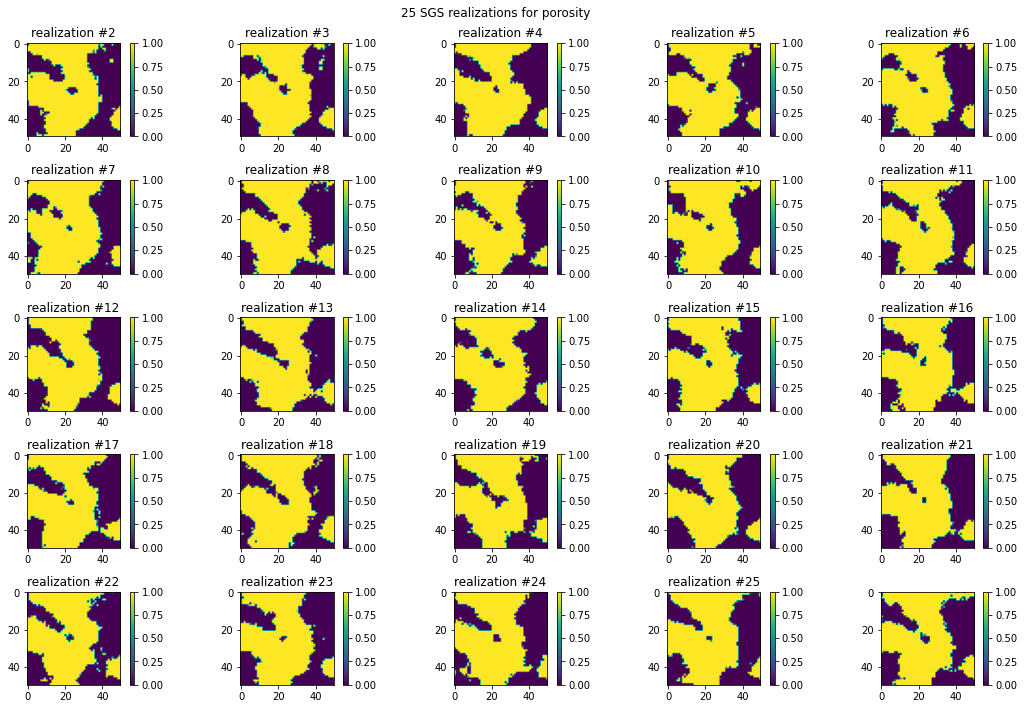

In [154]:
## Now, let's generate 25 realizations
%%time
Num_real = 25
Input_sis = create_sis_model(df, vario_sgs, Val_name = 'Facies',Val_range=[0,1], Num_real = Num_real, seed=77777, 
                                 grid_dim = [nx,ny,nz], horizon_grid_size = xsiz, vertical_grid_size = zsiz, 
                                 ) 
# Run GSLIB and read output (sisim.out) 
sis = sgs_realizations(Input_sis)
shape_of_sis = sis.shape
if len(sis.shape)>=3:
    for i in range(sis.shape[0]):
        sis[i] = sis[i,::-1]
else:
    sis = sis[::-1]

# visualize realizations
plt.figure(figsize = (15,10))
plt.suptitle('25 SGS realizations for porosity')
for i in range(25):
    plt.title(f'realization #{i+1}')
    plt.subplot(5,5,i+1)
    plt.imshow(sis[i], cmap = 'viridis', vmin = 0.0, vmax = 1.0)
    plt.colorbar()
plt.tight_layout()

I hope you find this code and demonstration useful. I'm always happy to discuss any question you may find,

*Honggeun (honggeun.jo@inha.ac.kr)* 

**Honggeun Jo**, Ph.D., P.Eng. Assistant Professor The Department of Energy Resources Engineering, Inha University (Korea).
